In [1]:
using Revise, DrWatson
@quickactivate

In [2]:
using main
using Distributions, BenchmarkTools, Plots, Pipe, ProgressMeter
ProgressMeter.ijulia_behavior(:clear);

#### Functions for generating plots

In [3]:
cls = palette(:linear_wcmr_100_45_c42_n256, 100, rev=false)

function plt(d=2; lim=(-5, 5), l=200, bar=false)
    sq = range(lim..., length=l)
    if d == 2
        contourf(sq, sq, (x, y) -> model(d).f([x; y; fill(0, model(d).d - 2)]), c=cls, lw=0.1, colorbar=bar)
    elseif d >= 3
        contourf(sq, sq, (x, y) -> model(d).f([x; y; fill(0, model(d).d - 2)]), c=cls, lw=0.1, colorbar=bar)
    end
end

function plot_colorbar(lim)
    scatter([0, 0], [0, 1],
        zcolor=lim, clims=lim, xlims=(1, 1.01), c=cls,
        label="", colorbar_title="", framestyle=:none
    )
end


function make_plot(x1, x2, d, lim; kwargs...)
    k = sample(1:d, 2, replace=false)

    l = @layout [
        [grid(1, 2)
        a{0.25h}
        b{0.25h}] c{0.01w}
    ]

    p = plt(d, lim=lim)
    p0 = plot_colorbar((0, 1))
    p1 = scatter(p, x1[:, k[1]], x1[:, k[2]], label="HMC", ratio=1, grid=false; legend=:bottomright, ma=1.0)
    p2 = scatter(p, x2[:, k[1]], x2[:, k[2]], label="HaRAM", ratio=1, grid=false; legend=:bottomright, ma=1.0)
    p3 = plot(x1[:, 1], ylim=lim, label="HMC", legend=:topright)
    p4 = plot(x2[:, 1], ylim=lim, label="HaRAM", legend=:topright)

    plot(p1, p2, p3, p4, p0, layout=l, title=[i == 5 ? "(d=$d)" : "" for j in 1:1, i in 1:5]; kwargs...)
end


model(d) = main.Model(
    ξ=MixtureModel(
        [MvNormal(x, 1.0 / d^0.2) for x in ([-10, +10] .* fill(ones(d)) ./ √d)]
    )
)

theme(:default)
Plots.gr_cbar_width[] = 0.02
gr(fmt=:png, levels=4, xguidefontsize=9, msc=:black, msw=0.1, tickfontsize=7)

Plots.GRBackend()

In [4]:
model(d) = Model(
    ξ=MixtureModel(
        [MvNormal(x, 1.0 / d^0.2) for x in ([-10, +10] .* fill(ones(d)) ./ √d)]
    )
)

model (generic function with 1 method)

---
### Example 1: $\mathbb R^3$

In [5]:
d, lim = 3, (-8, 8);

In [6]:
@time s, a = mcmc(
    DualAverage(λ=20, δ=0.55),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:58
  HMC:  0.9556088782243551


Acceptance Ratio = 0.9565
 60.769091 seconds (53.25 M allocations: 2.761 GiB, 2.43% gc time, 62.77% compilation time: 0% of which was recompilation)


In [7]:
@time s, a = mcmc(
    DualAverage(λ=20, δ=0.55),
    HaRAM(),
    model(d); n=5000, n_burn=500
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:17
  HaRAM:  0.7518496300739852


Acceptance Ratio = 0.7439
 17.837557 seconds (44.15 M allocations: 2.372 GiB, 5.02% gc time, 8.85% compilation time)


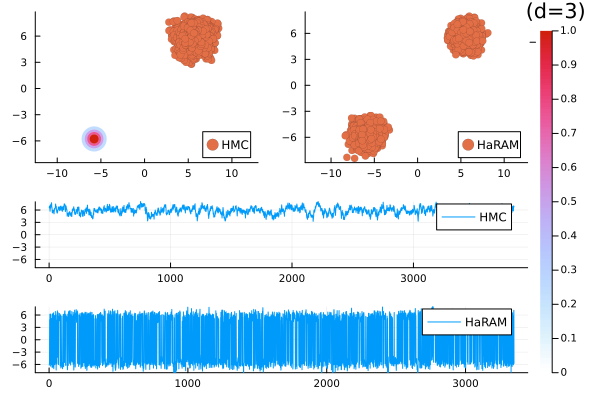

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [8]:
make_plot(x_hmc, x_haram, d, lim)

---
### Example 2: $\mathbb R^{10}$

In [9]:
d, lim = 10, (-6, 6)

(10, (-6, 6))

In [10]:
@time s, a  = mcmc(
    DualAverage(λ=10, δ=0.65),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
  HMC:  0.9256148770245951


Acceptance Ratio = 0.931
  5.877271 seconds (11.71 M allocations: 1.185 GiB, 7.75% gc time, 17.51% compilation time)


In [11]:
@time s, a = mcmc(
    DualAverage(λ=20, δ=0.55),
    HaRAM(),
    model(d); n=5000, n_burn=1000
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:13
  HaRAM:  0.3203359328134373


Acceptance Ratio = 0.3198
 13.257540 seconds (29.45 M allocations: 3.273 GiB, 8.46% gc time)


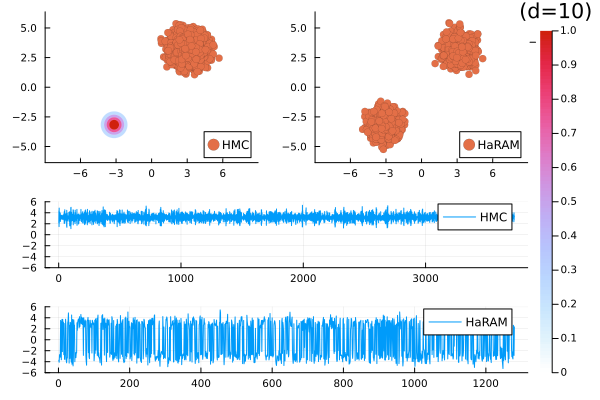

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [12]:
make_plot(x_hmc, x_haram, d, lim)

-----
### Example 3: $\mathbb R^{50}$

In [13]:
d, lim = 50, (-3, 3)

(50, (-3, 3))

In [14]:
@time s, a = mcmc(
    DualAverage(λ=20, δ=0.55),
    HMC(),
    model(d); n=5000, n_burn=1000
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:45
  HMC:  0.9110177964407119


Acceptance Ratio = 0.9125
 45.298045 seconds (40.18 M allocations: 45.901 GiB, 10.95% gc time, 2.62% compilation time)


In [15]:
@time s, a = mcmc(
    DualAverage(λ=20, δ=0.555),
    HaRAM(),
    model(d); n=5000, n_burn=1000
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:01:12
  HaRAM:  0.7006598680263947


Acceptance Ratio = 0.7039
 72.237922 seconds (65.50 M allocations: 76.882 GiB, 11.26% gc time)


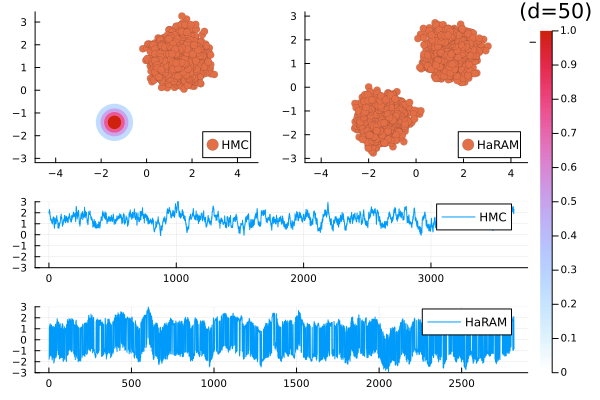

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [16]:
make_plot(x_hmc, x_haram, d, lim)

-----
### Example 4: $\mathbb R^{100}$

In [28]:
d, lim = 100, (-2, 2)

(100, (-2, 2))

In [29]:
@time s, a = mcmc(
    DualAverage(λ=30, δ=0.55),
    HMC(),
    model(d); n=5000, n_burn=500
)
x_hmc = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:02:08
  HMC:  0.597880423915217


Acceptance Ratio = 0.5968
128.215303 seconds (72.96 M allocations: 225.494 GiB, 11.08% gc time)


In [30]:
@time s, a = mcmc(
    DualAverage(λ=30, δ=0.55),
    HaRAM(),
    model(d); n=5000, n_burn=500
)
x_haram = s[a, :];

Progress: 100%|█████████████████████████████████████████| Time: 0:07:01
  HaRAM:  0.7428514297140572


Acceptance Ratio = 0.7439
421.657633 seconds (232.06 M allocations: 712.704 GiB, 11.36% gc time)


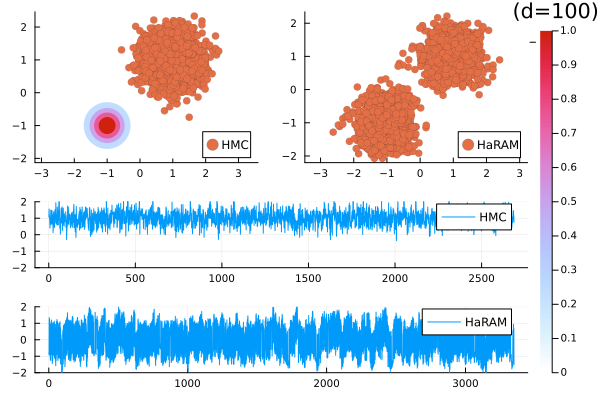

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [31]:
make_plot(x_hmc, x_haram, d, lim)